In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# Standard libraries
import math
import os
import urllib.request
from functools import partial
from urllib.error import HTTPError

# Plotting
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# PyTorch Lightning
import pytorch_lightning as pl
import seaborn as sns

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

# Torchvision
import torchvision
from IPython.display import set_matplotlib_formats
from pytorch_lightning.callbacks import ModelCheckpoint
from torchvision import transforms
from torchvision.datasets import CIFAR100
from tqdm.notebook import tqdm

# plt.set_cmap("cividis")
# %matplotlib inline
# set_matplotlib_formats("svg", "pdf")  # For export
matplotlib.rcParams["lines.linewidth"] = 2.0
sns.reset_orig()

# Path to the folder where the datasets are/should be downloaded (e.g. CIFAR10)
DATASET_PATH = os.environ.get("PATH_DATASETS", "data/")
# Path to the folder where the pretrained models are saved
CHECKPOINT_PATH = os.environ.get("PATH_CHECKPOINT", "saved_models/Transformers/")

# Setting the seed
pl.seed_everything(42)

# Ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print("Device:", device)

Global seed set to 42


Device: cpu


In [10]:
from torch.utils.data import Dataset, DataLoader


class ImageDataSet(Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        img1, img2, action = self.data[idx]
        if self.transform:
            img1 = self.transform(img1)
            img2 = self.transform(img2)
        return [img1, img2], action


In [2]:
import numpy as np
from os import listdir
from os.path import isfile, join
import numpy as np

store_path = '/Volumes/Documents/datasets/rovio/'
data_files = [f for f in listdir(store_path) if isfile(join(store_path, f))]

In [3]:
from model.data_set import get_datasets

/Users/renat/opt/anaconda3/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
train_dl, test_dl = get_datasets(batch_size=32, train_fraction=0.8)
it = iter(train_dl)

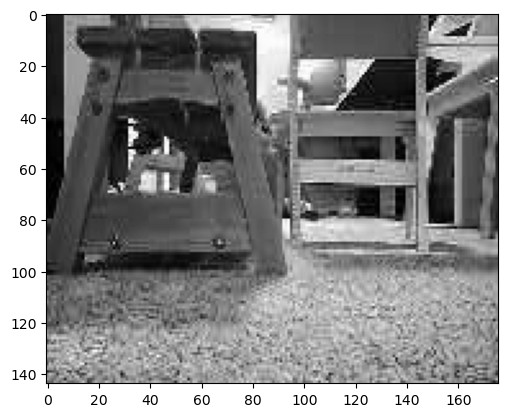

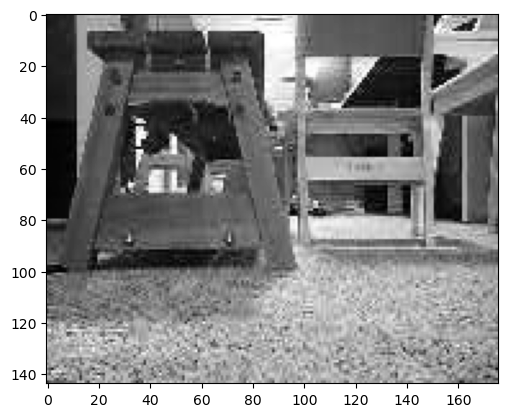

Label: tensor([1.0000, 5.0000, 2.9235], dtype=torch.float64)


In [15]:
# Display image and label.
(im1, im2, im12), vector = next(it)
plt.figure()
img = im1[0].squeeze()
label = vector[0]
plt.imshow(img, cmap="gray")
plt.figure()
img = im2[0].squeeze()
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [25]:
from torch.nn.functional import one_hot
import torch


In [26]:
one_hot(vector[:, 0].to(torch.int64), 10)

tensor([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],


In [22]:
vector[:, 0]

tensor([1., 4., 9., 7., 9., 7., 8., 8., 9., 1., 0., 9., 4., 3., 8., 9., 0., 6.,
        5., 0., 3., 4., 4., 1., 8., 8., 0., 8., 4., 5., 4., 3.],
       dtype=torch.float64)

In [2]:
from data_generator import DataGenerator
import numpy as np
import os
import uuid

In [3]:
generator = DataGenerator()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

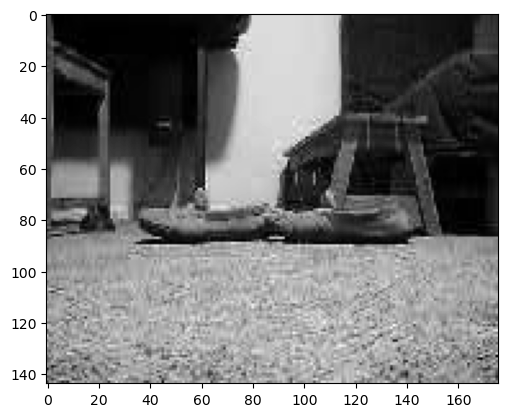

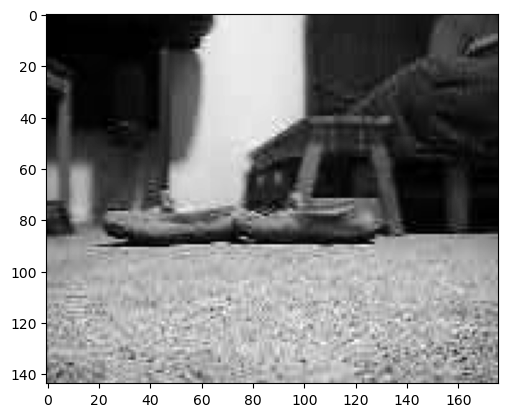

In [8]:
im1, im2, vector = generator.get_data()
plt.figure()
plt.imshow(im1, cmap="gray")
plt.figure()
plt.imshow(im2, cmap="gray")